In [11]:
# Cell to hide - just an option and import other functions

import pandas as pd
pd.set_option('display.max_columns', 27)

%run 1-functions.ipynb

## Predict the width of a ship <a class="anchor" id="width"></a>

### Make the prediction

You customer would like a model that is able to predict the width of a ship, knowing its length. For this first task, the model will take only the length attribute as an input, and predict the width. You can use the static dataset.

In [12]:
import pandas as pd

static_data = pd.read_csv('./static_data.csv')

We can put both attribute names in two variables: ``x`` (containing a list of the predictive variables, here only length) and ``y`` (containing a list of the predicted variable). In general, the list ``y`` will always contain only one variable, as we only want to predict one attribute at a time.

In [91]:
# Prediction of Width from Length

x = ['Length']
y = ['Width']

As the prediction of the width of a ship is a regression problem, we use the function ``knn_regression()`` __TODO: add link to functions page when it is made__ to make the prediction. Then we can calculate the MAE __TODO: add link to supervised learning page__ with the method [mean_absolute_error()](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.mean_absolute_error.html) from the ``sklearn`` library.

In [93]:
from sklearn.metrics import mean_absolute_error

pred1, ytest1 = knn_regression(static_data, x, y)
print('MAE with all data: ' + str(mean_absolute_error(pred1, ytest1)))

MAE with all data: 2.73451052631579


In the previous part, we already identified that the length and width attributes contain some missing values. We can try to make a prediction on a selected part of the dataset, that doesn't contain missing values. For that, we use the method [dropna()](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.dropna.html) on the dataframe. Then, we make a new prediction on the selected dataset and print the MAE.

In [92]:
static_selected = static_data[[x[0], y[0]]].dropna()

pred2, ytest2 = knn_regression(static_selected, x, y)
print('MAE without NaN: ' + str(mean_absolute_error(pred2, ytest2)))

MAE without NaN: 1.3051934065934065


The error dropped (this means that the performance of the model increased when we removed the missing data). Before coming to any conclusion, we need to analyze in details the reason of this increase of performance, and think if it is really what we want.

### Analyze the results

Originally, the KNN algorithm cannot handle missing values. This means that, in the function ``knn_regression()``, an additional step has been taken to ensure that the prediction was not made on a dataset containing missing values. The basic action that we chose here is to replace every missing value with ``0``.

Let's have a look at the number of missing values for each attribute, to get an idea on how much of the dataset was replaced by ``0`` value:

In [31]:
print('Number of instances in the dataset: ' + str(len(static_data)))
print('Number of missing values for Length: ' + str(static_data['Length'].isnull().sum()))
print('Number of missing values for Width: ' + str(static_data['Width'].isnull().sum()))

Number of instances in the dataset: 1520
Number of missing values for Length: 300
Number of missing values for Width: 609


As we can see, for the predicted attribute ``Width``, more than a third of the dataset was containing missing values, that were replaced by zero value.

To go further, we can compare the distribution of the dataset with missing values, and the one with replaced 0 values. To replace all missing values in the dataset, we use the function [fillna()](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.fillna.html), with the parameter ``value = 0``.

We plot the two considered attributes together. This allows us to understand how the KNN algorithm makes predictions according to the value of the Length attribute.

Text(0.5, 1.0, 'Width vs. Length with NaN filled with zero values')

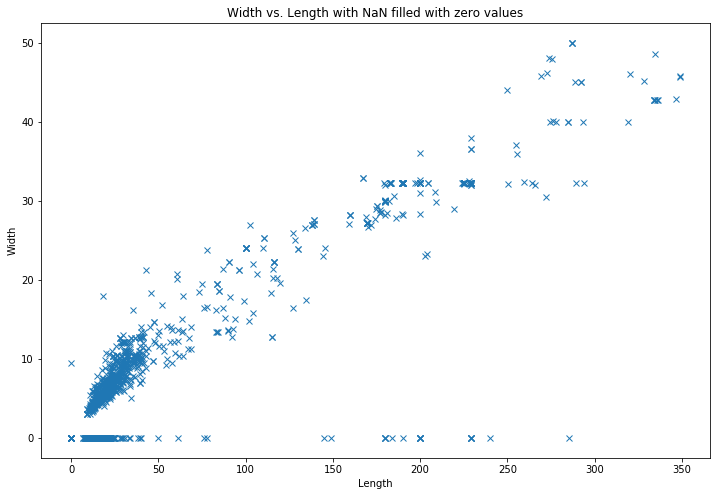

In [69]:
# Missing values filled with zeros

import matplotlib.pyplot as plt

plt.figure(figsize = (12, 8))
plt.plot(static_data.fillna(value = 0)['Length'], static_data.fillna(value = 0)['Width'], 'x')
plt.xlabel('Length')
plt.ylabel('Width')
plt.title('Width vs. Length with NaN filled with zero values')

Text(0.5, 1.0, 'Width vs. Length with NaN dropped')

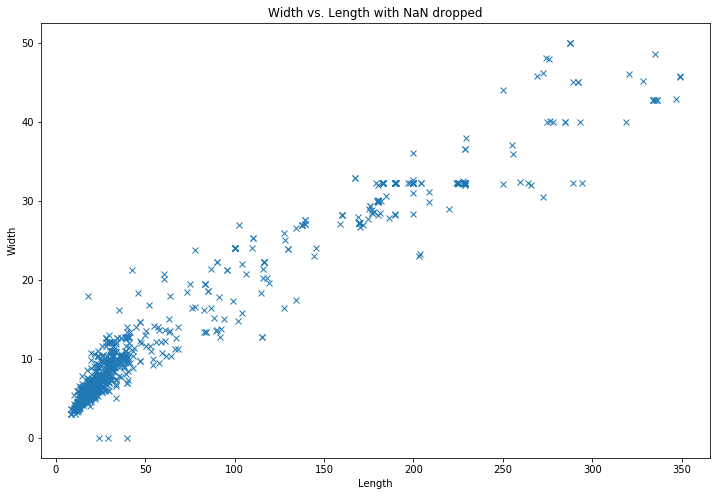

In [94]:
# Missing values dropped

import matplotlib.pyplot as plt

plt.figure(figsize = (12, 8))
static_selected = static_data[[x[0], y[0]]].dropna()
plt.plot(static_selected['Length'], static_selected['Width'], 'x')
plt.xlabel('Length')
plt.ylabel('Width')
plt.title('Width vs. Length with NaN dropped')

In [95]:
# For beginner version: cell to hide

import matplotlib.pyplot as plt
import numpy as np
import ipywidgets as widgets
from ipywidgets import interact

modes = ['filled_zeros', 'drop_na']

def plot_2att(mode):
    if mode == 'filled_zeros':
        df = static_data.fillna(value = 0)
        title = 'Width vs. Length with NaN filled with zero values'
    elif mode == 'drop_na':
        df = static_data[[x[0], y[0]]].dropna()
        title = 'Width vs. Length with NaN dropped'
    
    plt.figure(figsize = (12, 8))
    plt.plot(df['Length'], df['Width'], 'x')
    plt.xlabel('Length')
    plt.ylabel('Width')
    plt.title(title)

interact(plot_2att,
         mode = widgets.Dropdown(options = modes,
                                 value = modes[0],
                                 description = 'Mode:',
                                 disabled = False,))

interactive(children=(Dropdown(description='Mode:', options=('filled_zeros', 'drop_na'), value='filled_zeros')…

<function __main__.plot_2att(mode)>

We can see that the attribute ``Width`` contains more zero values than the attribute ``Length``: for the prediction, as the KNN algorithm bases its results on the value of the attribute ``Length``, the predictions will stay on the diagonal more than predict 0 values. This will lead to a greater error, as we will see now.

Now we can have a look at the predictions made by the KNN algorithms, for both cases: we plot the predictions versus the true values (we got these lists when we used the function ``knn_regression()``): the more the plot shows a diagonal, the better the prediction was.

Text(0.5, 1.0, 'Prediction vs. true label with NaN filled with zero values')

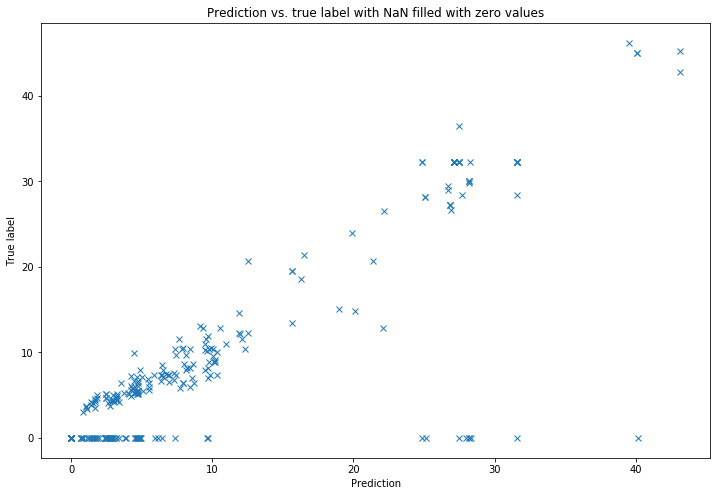

In [96]:
# Missing values filled with zeros
pred = []
for element in pred1:
    pred.append(element[0])

plt.figure(figsize = (12, 8))
plt.plot(pred, ytest1, 'x')
plt.xlabel('Prediction')
plt.ylabel('True label')
plt.title('Prediction vs. true label with NaN filled with zero values')

Text(0.5, 1.0, 'Prediction vs. true label with NaN dropped')

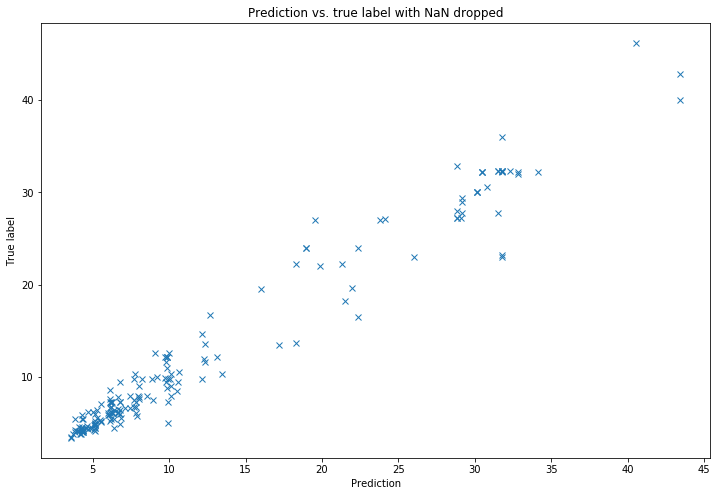

In [97]:
# Missing values dropped
pred = []
for element in pred2:
    pred.append(element[0])

plt.figure(figsize = (12, 8))
plt.plot(pred, ytest2, 'x')
plt.xlabel('Prediction')
plt.ylabel('True label')
plt.title('Prediction vs. true label with NaN dropped')

In [98]:
# For beginner version: cell to hide

import matplotlib.pyplot as plt
import numpy as np
import ipywidgets as widgets
from ipywidgets import interact

modes = ['filled_zeros', 'drop_na']
x = ['Length']
y = ['Width']
pred1, ytest1 = knn_regression(static_data, x, y)
pred2, ytest2 = knn_regression(static_selected, x, y)

def plot_2att(mode):
    
    plt.figure(figsize = (12, 8))
    
    if mode == 'filled_zeros':
        pred = []
        for element in pred1:
            pred.append(element[0])
        plt.plot(pred, ytest1, 'x')
        title = 'Prediction vs. true label with NaN filled with zero values'
    elif mode == 'drop_na':
        pred = []
        for element in pred2:
            pred.append(element[0])
        plt.plot(pred, ytest2, 'x')
        title = 'Prediction vs. true label with NaN dropped'

    plt.xlabel('Prediction')
    plt.ylabel('True label')
    plt.title(title)

interact(plot_2att,
         mode = widgets.Dropdown(options = modes,
                                 value = modes[0],
                                 description = 'Mode:',
                                 disabled = False,))

interactive(children=(Dropdown(description='Mode:', options=('filled_zeros', 'drop_na'), value='filled_zeros')…

<function __main__.plot_2att(mode)>

From these visualizations, it is clear that in the case where the missing values were filled with zeros, the model didn't give much zero predictions. It is then understandable that the error was greater in the case were the missing values were replaced with zeros: the prediction gave "normal" values, following the diagonal of the distribution of the attributes length vs. width, instead of giving zero values.

As a reminder, the mean absolute error is the average of the difference between the prediction and the actual value. If the actual value is 0, the error is the value of the prediction, which tends to increase the error easily.

### What is the best scenario?

To make a choice on how to deal with missing values in that case, we have to connect our analysis to the meaning of the problem: if we choose to replace the missing values with zero values, this implies that we have zero values in our test set. The test set is the dataset that is compared with the data we would have in the real world, and we would make predictions on.

A zero value for the length or width of a ship is not a natural value: you will never find a ship with a length of 0 meters. So in that case, replacing missing values with zero does not make much sense and we can think that dropping the missing values is the best solution for creating a model that comes closest to a real-world situation.

### Quiz

<iframe src="https://h5p.org/h5p/embed/755089" width="694" height="600" frameborder="0" allowfullscreen="allowfullscreen"></iframe><script src="https://h5p.org/sites/all/modules/h5p/library/js/h5p-resizer.js" charset="UTF-8"></script>

## Predict the mean speed from the type of vessel <a class="anchor" id="meansog"></a>

Your customer now would like to be able to predict the mean SOG of a ship, knowing the type of ship. This can be useful to predict when a particular ship would arrive at a lock, for example. The static dataset is again used in this case.

### Make the prediction

Solve these two widgets to determine the values of the ``x`` and ``y`` variables and the appropriate function to use (if the problem is regression or classification).

<iframe src="https://h5p.org/h5p/embed/753577" width="694" height="600" frameborder="0" allowfullscreen="allowfullscreen"></iframe><script src="https://h5p.org/sites/all/modules/h5p/library/js/h5p-resizer.js" charset="UTF-8"></script>

<iframe src="https://h5p.org/h5p/embed/753637" width="694" height="300" frameborder="0" allowfullscreen="allowfullscreen"></iframe><script src="https://h5p.org/sites/all/modules/h5p/library/js/h5p-resizer.js" charset="UTF-8"></script>

Start with filling the ``x`` and ``y`` variables with the appropriate attributes (the attributes must be passed as strings, on this form: ``'attribute'``).

In [ ]:
# Prediction of MeanSOG from VesselType
x = []
y = []

Make the predictions with the right prediction function (replace the ``xxx`` with the appropriate name: ``classification`` or ``regression``).

In [ ]:
static_selected = static_data[[x[0], y[0]]].dropna()

pred1, ytest1 = knn_xxx(static_data, x, y)
pred2, ytest2 = knn_xxx(static_selected, x, y)

print('MAE with all data: ' + str(mean_absolute_error(pred1, ytest1)))
print('MAE without NaN: ' + str(mean_absolute_error(pred2, ytest2)))

In [100]:
# For beginner version: hide cell

import numpy as np
import ipywidgets as widgets
from ipywidgets import interact
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import accuracy_score

functions = ['not chosen', 'classification', 'regression']
attributes = static_data.columns

def make_prediction(x, y, function):
    static_selected = static_data[[x, y]].dropna()
    
    if function == 'regression' and static_data[y].dtype.name in ['object', 'int64', 'float64']:
        pred1, ytest1 = knn_regression(static_data, [x], [y])
        pred2, ytest2 = knn_regression(static_selected, [x], [y])
        
        print('MAE with all data: ' + str(mean_absolute_error(pred1, ytest1)))
        print('MAE without NaN: ' + str(mean_absolute_error(pred2, ytest2)))
    
    elif function == 'classification' and static_data[y].dtype.name == ['category']:
        pred1, ytest1 = knn_classification(static_data, [x], [y])
        pred2, ytest2 = knn_classification(static_selected, [x], [y])
        
        print('Accuracy with all data: ' + str(accuracy_score(pred1, ytest1)))
        print('Accuracy without NaN: ' + str(accuracy_score(pred2, ytest2)))
        
    elif function == 'not chosen':
        print('Choose a type of task.')
        
    else:
        print('The type of task does not match the type of the attribute to predict.')

interact(make_prediction,
         x = widgets.Dropdown(
            options = attributes,
            value = attributes[0],
            description = 'x = ',
            disabled = False,),
         y = widgets.Dropdown(
            options = attributes,
            value = attributes[0],
            description = 'y = ',
            disabled = False,),
         function = widgets.Dropdown(
            options = functions,
            value = functions[0],
            description = 'Type: ',
            disabled = False,))

interactive(children=(Dropdown(description='x = ', options=('TripID', 'MMSI', 'MeanSOG', 'VesselName', 'IMO', …

<function __main__.make_prediction(x, y, function)>

This time, on the contrary of the previous prediction, we see that the performance decreases when we drop the missing data. To understand why, let's do a similar analysis on these attributes and the predictions.

### Analyze the results

Just like for the prediction of the width, the function used was ``knn_regression()``, which cannot deal with missing values. The missing values where therefore replaced with zero values again.

First, let's see how many missing values we have for the two considered attributes:

In [103]:
print('Number of instances in the dataset: ' + str(len(static_data)))
print('Number of missing values for x attribute: ' + str(static_data[x[0]].isnull().sum()))
print('Number of missing values for y attribute: ' + str(static_data[y[0]].isnull().sum()))

Number of instances in the dataset: 1520
Number of missing values for x attribute: 233
Number of missing values for y attribute: 0


In [90]:
# For beginner version: hide cell

import numpy as np
import ipywidgets as widgets
from ipywidgets import interact

attributes = static_data.columns

def print_missing(x, y):
    
    print('Number of instances in the dataset: ' + str(len(static_data)))
    print('Number of missing values for x attribute: ' + str(static_data[x].isnull().sum()))
    print('Number of missing values for y attribute: ' + str(static_data[y].isnull().sum()))

interact(print_missing,
         x = widgets.Dropdown(
            options = attributes,
            value = attributes[0],
            description = 'x = ',
            disabled = False,),
         y = widgets.Dropdown(
            options = attributes,
            value = attributes[0],
            description = 'y = ',
            disabled = False,))

interactive(children=(Dropdown(description='x = ', options=('TripID', 'MMSI', 'MeanSOG', 'VesselName', 'IMO', …

<function __main__.print_missing(x, y)>

Text(0.5, 1.0, 'y attribute vs. x attribute with NaN filled with zeros')

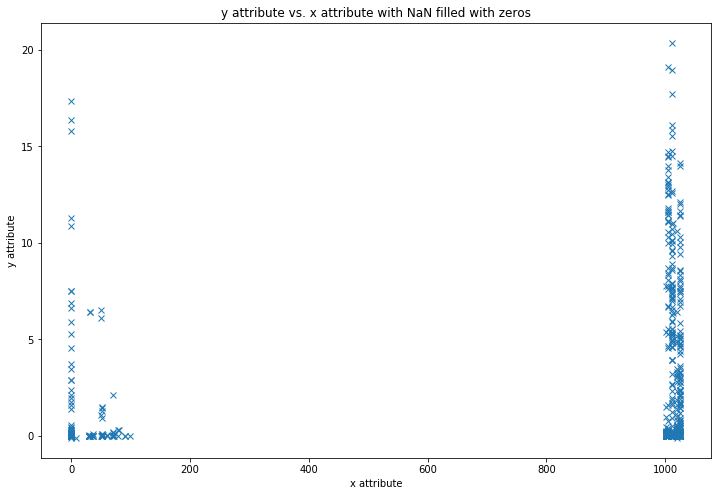

In [116]:
# Missing values filled with zeros

import matplotlib.pyplot as plt

plt.figure(figsize = (12, 8))
plt.plot(static_data.fillna(value = 0)[x[0]], static_data.fillna(value = 0)[y[0]], 'x')
plt.xlabel('x attribute')
plt.ylabel('y attribute')
plt.title('y attribute vs. x attribute with NaN filled with zeros')

Text(0.5, 1.0, 'y attribute vs. x attribute with NaN dropped')

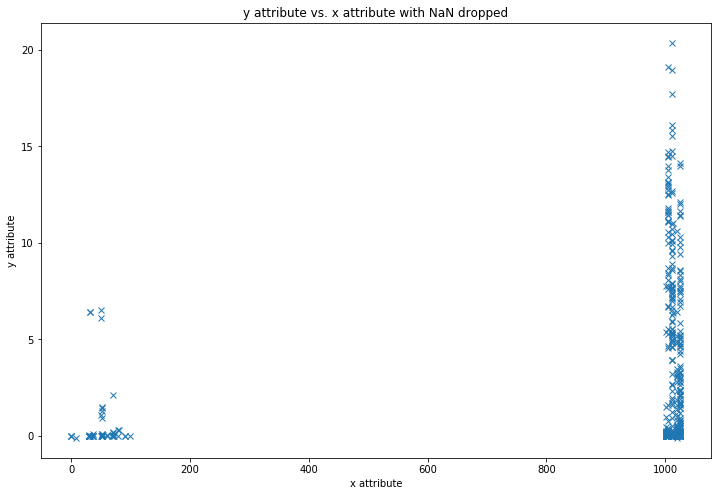

In [105]:
# Missing values dropped

import matplotlib.pyplot as plt

plt.figure(figsize = (12, 8))
static_selected = static_data[[x[0], y[0]]].dropna()
plt.plot(static_selected[x[0]], static_selected[y[0]], 'x')
plt.xlabel('x attribute')
plt.ylabel('y attribute')
plt.title('y attribute vs. x attribute with NaN dropped')

It is kind of hard to draw a conclusion from these two graphs. Let's have a look at the predictions made.

In [106]:
x = ['VesselType']
y = ['MeanSOG']
pred1, ytest1 = knn_regression(static_data, x, y)
pred2, ytest2 = knn_regression(static_selected, x, y)

Text(0.5, 1.0, 'Prediction vs. true label with NaN filled with zero values')

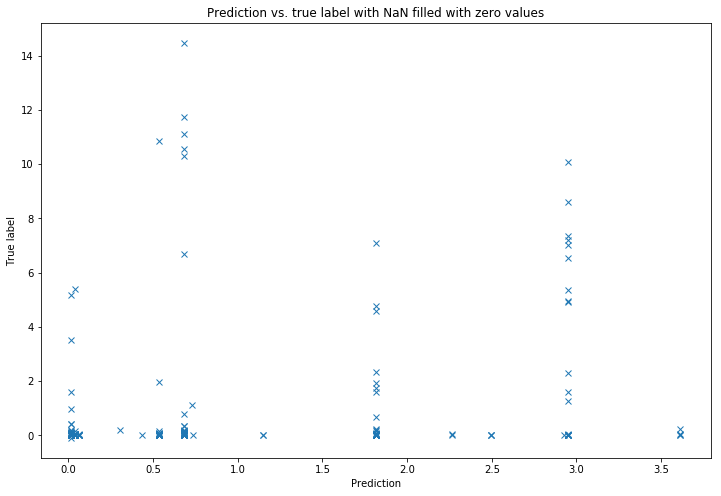

In [107]:
# Missing values filled with zeros
pred = []
for element in pred1:
    pred.append(element[0])

plt.figure(figsize = (12, 8))
plt.plot(pred, ytest1, 'x')
plt.xlabel('Prediction')
plt.ylabel('True label')
plt.title('Prediction vs. true label with NaN filled with zero values')

Text(0.5, 1.0, 'Prediction vs. true label with NaN dropped')

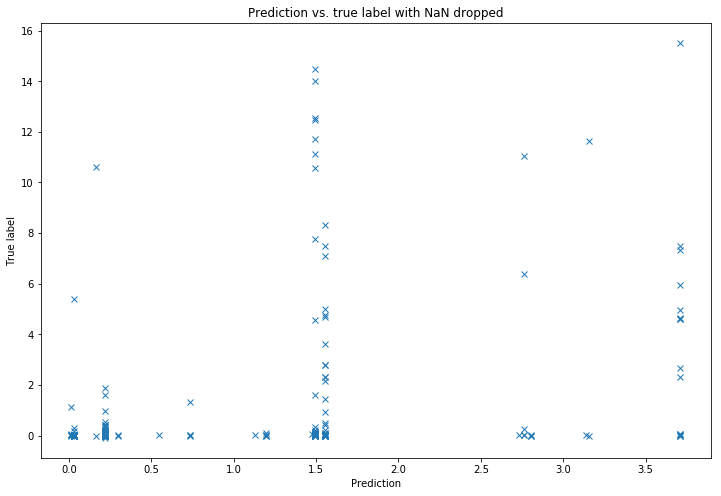

In [108]:
# Missing values dropped
pred = []
for element in pred2:
    pred.append(element[0])

plt.figure(figsize = (12, 8))
plt.plot(pred, ytest2, 'x')
plt.xlabel('Prediction')
plt.ylabel('True label')
plt.title('Prediction vs. true label with NaN dropped')

In [113]:
# For beginner version: cell to hide

import matplotlib.pyplot as plt
import numpy as np
import ipywidgets as widgets
from ipywidgets import interact

modes = ['filled_zeros', 'drop_na']
attributes = static_data.columns

def plot_2att(x, y, mode):
    
    static_selected = static_data[[x, y]].dropna()
    pred1, ytest1 = knn_regression(static_data, [x], [y])
    pred2, ytest2 = knn_regression(static_selected, [x], [y])
    
    plt.figure(figsize = (12, 8))
    
    if mode == 'filled_zeros':
        pred = []
        for element in pred1:
            pred.append(element[0])
        plt.plot(pred, ytest1, 'x')
        title = 'Prediction vs. true label with NaN filled with zero values'
    elif mode == 'drop_na':
        pred = []
        for element in pred2:
            pred.append(element[0])
        plt.plot(pred, ytest2, 'x')
        title = 'Prediction vs. true label with NaN dropped'

    plt.xlabel('Prediction')
    plt.ylabel('True label')
    plt.title(title)

interact(plot_2att,
         x = widgets.Dropdown(
            options = attributes,
            value = attributes[0],
            description = 'x = ',
            disabled = False,),
         y = widgets.Dropdown(
            options = attributes,
            value = attributes[0],
            description = 'y = ',
            disabled = False,),
        mode = widgets.Dropdown(
            options = modes,
            value = modes[0],
            description = 'Mode:',
            disabled = False,))

interactive(children=(Dropdown(description='x = ', options=('TripID', 'MMSI', 'MeanSOG', 'VesselName', 'IMO', …

<function __main__.plot_2att(x, y, mode)>

From these graphs, we can only see that the predictions are not really good (there are not many points on the diagonal, a perfect diagonal means a perfect match between predictions and true labels). To try to see a bit more, let's look at the distribution of the predictions:

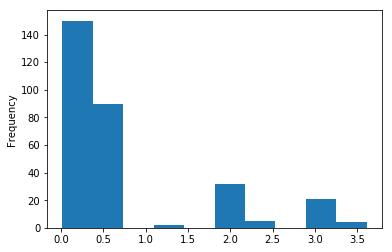

In [109]:
pred = []
for element in pred1:
    pred.append(element[0])
pd.Series(pred).plot.hist()

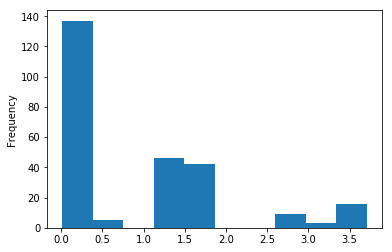

In [110]:
pred = []
for element in pred2:
    pred.append(element[0])
pd.Series(pred).plot.hist()

In [115]:
# For beginner version: cell to hide

import matplotlib.pyplot as plt
import numpy as np
import ipywidgets as widgets
from ipywidgets import interact

modes = ['filled_zeros', 'drop_na']
attributes = static_data.columns

def plot_hist(x, y, mode):
    
    static_selected = static_data[[x, y]].dropna()
    pred1, ytest1 = knn_regression(static_data, [x], [y])
    pred2, ytest2 = knn_regression(static_selected, [x], [y])
    
    if mode == 'filled_zeros':
        pred = []
        for element in pred1:
            pred.append(element[0])
    elif mode == 'drop_na':
        pred = []
        for element in pred2:
            pred.append(element[0])

    pd.Series(pred).plot.hist()

interact(plot_hist,
         x = widgets.Dropdown(
            options = attributes,
            value = attributes[0],
            description = 'x = ',
            disabled = False,),
         y = widgets.Dropdown(
            options = attributes,
            value = attributes[0],
            description = 'y = ',
            disabled = False,),
        mode = widgets.Dropdown(
            options = modes,
            value = modes[0],
            description = 'Mode:',
            disabled = False,))

interactive(children=(Dropdown(description='x = ', options=('TripID', 'MMSI', 'MeanSOG', 'VesselName', 'IMO', …

<function __main__.plot_hist(x, y, mode)>

From these two histograms, something gets clearer: when the missing values are filled with zeros, the prediction gives much more low values (close to 0) predictions for the MeanSOG than when the missing values are dropped.

The attribute MeanSOG does not contain any missing values, so the only values that are replaced with 0 are the missing values for VesselType. However, we saw when we examined the dataset in the previous part (__TODO: add link to examine part__), that the attribute MeanSOG contains a lot of low values (under 1). We can conclude that a zero value for the VesselType would give a low value prediction for the MeanSOG: and as low values constitute the majority of the MeanSOG attribute, the chance of a zero prediction being close to the true label is high. That is the reason why the error increases when we delete these values.

A low MeanSOG value is considered "normal" in the dataset, so a dataset that encourages a low prediction will give a better performance.

### What is the best scenario?

We saw that dropping the missing values gives a worse performance because the model predicts less low values for the attribute MeanSOG. Keeping the missing values and replacing them with zero gives a better performance.

Now, is this what we want for our model?

This question is a bit tricker to solve. Instinctively, we would like a model that has the better performance. But the choice of replacing the missing values with zero values was a standard choice based on no solid thought, and this is not the best way to deal with decisions in problem-solving.

The fact that the model gave better performance is not related to the way of solving the task, and some further thoughts are always better to ensure that the model is built on a stable basis.

### Quiz

<iframe src="https://h5p.org/h5p/embed/755347" width="694" height="600" frameborder="0" allowfullscreen="allowfullscreen"></iframe><script src="https://h5p.org/sites/all/modules/h5p/library/js/h5p-resizer.js" charset="UTF-8"></script>

## How to deal with missing values

In general, there are 3 ways of dealing with missing values:
+ recover the value: sometimes, it is possible to recover the value, either by guessing or predicting with another machine learning algorithm. For example, for a broader task where we would use the attribute length and width for prediction: we can predict the missing width from the length attribute, with a good model (like the one we built here for example).
+ set up a constant value: just like we filled the missing values with zeros, it is possible to set up any constant value for the missing values. This works best if the attribute containing the missing values is not the only one used in the model, and a change of it would not change too much the task we want to solve. For example, taking the mean of the series, or the median value, could work.
+ drop the columns or the rows containing missing values: if an attributes has way too many missing values, it can make sense to just ignore it, and not include it in the model we build. On the other hands, if some rows contain missing values for a lot of different attributes, it can make sense to drop them.

The way of dealing with missing values depends on the dataset, the number of missing values and the type of problem we want to solve. There is no perfect answer, what is most important is to build a model that is thought through and that makes sense in the context it will be used.

Use the following quiz to test your newly acquired knowledge:

<iframe src="https://h5p.org/h5p/embed/755321" width="694" height="600" frameborder="0" allowfullscreen="allowfullscreen"></iframe><script src="https://h5p.org/sites/all/modules/h5p/library/js/h5p-resizer.js" charset="UTF-8"></script>